In [1]:
# read mapping from JSON file
import json
with open('./outputs/mapping.json', 'r') as f:
    final_mapping = json.load(f)
# print the final mapping
print("Final mapping:")
for key, value in final_mapping.items():
    print(f"{key}: {value}")

Final mapping:
RLT: ['Lufttechnische Anlagen']
Elektro: ['Starkstromanlagen', 'Fernmelde- und informationstechnische Anlagen', 'Nutzungsspezifische Anlagen']
Haustechn Einricht: ['Neu Ausstattung', 'Baukonstruktionen in Außenanlagen']
Sanitär: ['Abwasser-, Wasser-, Gasanlagen']
BuES, GLT, IZS: ['Gebäudeautomation']
Brandschutz: ['Nutzungsspezifische Anlagen']
Kältetechnik: ['Lufttechnische Anlagen', 'Nutzungsspezifische Anlagen', 'Abwasser-, Wasser-, Gasanlagen']
Heizung: ['Abwasser-, Wasser-, Gasanlagen']
Türen und Tore: ['Außenwände', 'Innenwände', 'Dächer']
Aufzug: ['Förderanlagen']
GEV: ['Nutzungsspezifische Anlagen', 'Gebäudeautomation', 'Starkstromanlagen']


In [2]:
import glob
# Collect customer categories in a dict
customer_files = glob.glob('./customer_data/jsons/*.json')
customer_buildings = {}
for building in customer_files:
    #read file
    with open(building, 'r') as f:
        data = json.load(f)
    customer_buildings[building.split('_')[-1].split('.')[0]] = list(data.keys())    

In [3]:
# Collect reference categories in a dict
reference_files = glob.glob('./reference_data/jsons/*.json')
ref_buildings = {}
for building in reference_files:
    #read file
    with open(building, 'r') as f:
        data = json.load(f)
    ref_buildings[building.split('_')[-1].split('.')[0]] = list(data.keys())


# We have collected the Customer Anlagen and the Reference Anlagen.
# We also have the mapping between Anlagen
# We can start the comparison

In [4]:
# Iterate through each customer building and compare it with EACH reference building using the final mapping.
# log everything in a dict for sinpler visualization later
coverage_array = {}
for customer_building, customer_cats in customer_buildings.items():
    print(f"\nComparing customer building: {customer_building}")
    coverage_array[customer_building] = {}
    for ref_building, ref_cats in ref_buildings.items():
        print(f"  Against reference building: {ref_building}")
        covered_reference_categories = set()
        for cust_cat in customer_cats:
            mapped_refs = final_mapping.get(cust_cat, [])
            covered_reference_categories.update(mapped_refs)
        uncovered_reference_categories = set(ref_cats) - covered_reference_categories
        print(f"    Covered reference categories: {covered_reference_categories}")
        print(f"    Uncovered reference categories: {uncovered_reference_categories}")
        coverage = len(covered_reference_categories) / (len(covered_reference_categories) + len(uncovered_reference_categories)) * 100
        print(f"    Reference Converage: {coverage:.1f}%")
        coverage_array[customer_building][ref_building] = coverage




Comparing customer building: 26287
  Against reference building: 2028
    Covered reference categories: {'Baukonstruktionen in Außenanlagen', 'Gebäudeautomation', 'Fernmelde- und informationstechnische Anlagen', 'Starkstromanlagen', 'Innenwände', 'Außenwände', 'Dächer', 'Abwasser-, Wasser-, Gasanlagen', 'Lufttechnische Anlagen', 'Neu Ausstattung', 'Förderanlagen', 'Nutzungsspezifische Anlagen'}
    Uncovered reference categories: {'Neu Sonstiges zur KG', 'Wärmeversorgungsanlagen'}
    Reference Converage: 85.7%
  Against reference building: 546
    Covered reference categories: {'Baukonstruktionen in Außenanlagen', 'Gebäudeautomation', 'Fernmelde- und informationstechnische Anlagen', 'Starkstromanlagen', 'Innenwände', 'Außenwände', 'Dächer', 'Abwasser-, Wasser-, Gasanlagen', 'Lufttechnische Anlagen', 'Neu Ausstattung', 'Förderanlagen', 'Nutzungsspezifische Anlagen'}
    Uncovered reference categories: {'Wärmeversorgungsanlagen'}
    Reference Converage: 92.3%
  Against reference build

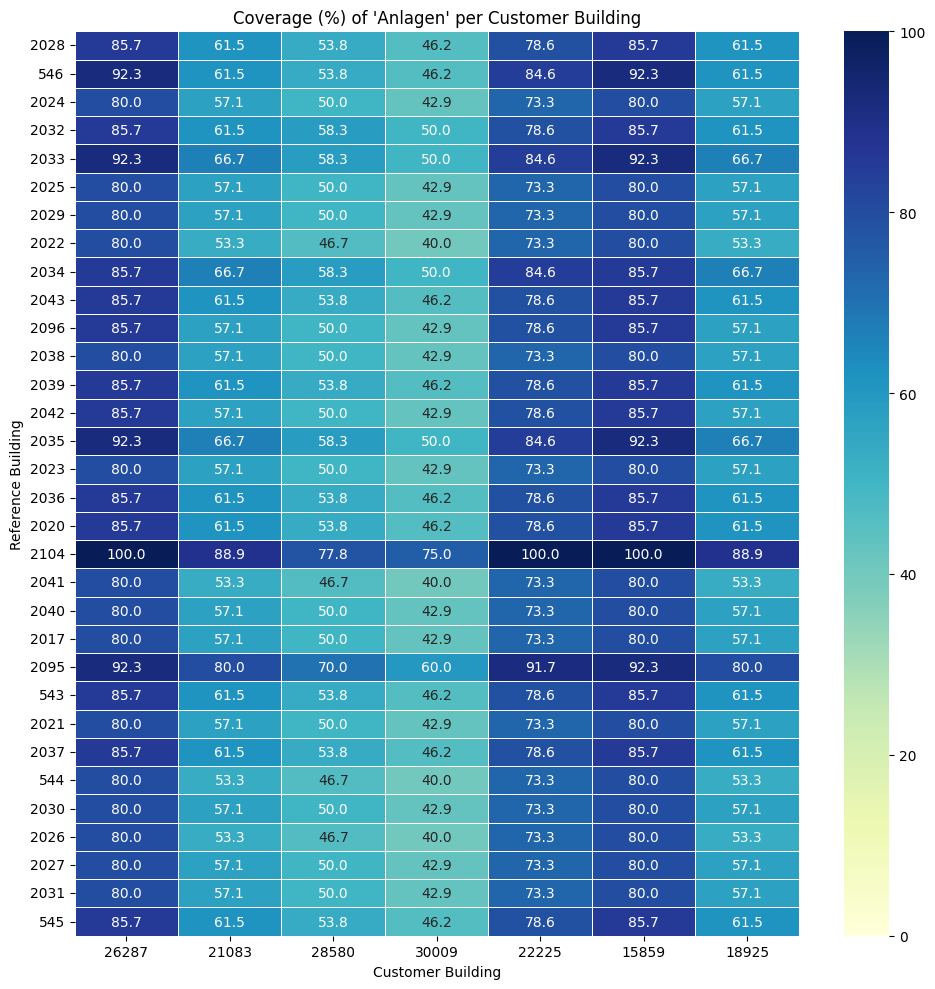

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
matrix = pd.DataFrame(index=ref_buildings.keys(), columns=customer_buildings.keys())
for ref in ref_buildings:
    for cust in customer_buildings:
        matrix.loc[ref, cust] = coverage_array[cust][ref]

matrix = matrix.astype(float)

plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', linewidths=.5, vmin=0, vmax=100, fmt='.1f')
plt.title("Coverage (%) of 'Anlagen' per Customer Building")
plt.ylabel("Reference Building")
plt.xlabel("Customer Building")
plt.tight_layout()
plt.savefig("./outputs/Anlagen_coverage.png", format='png', dpi=300, bbox_inches='tight')
plt.show()
